In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams["mathtext.default"] = 'regular'
#optional settings:
# allows us to open the file in illustrator to edit stuff.
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.size'] = 12


In [2]:
# change default plot resolution to 100dpi and save resolution to 300dpi
sns.set(rc={"figure.dpi": 100, 'savefig.dpi': 300})
sns.set_context('notebook')
sns.set_theme(style="white")
sns.set_style('ticks')


In [3]:
# Import data from local filesystem
file_path = "C:/Users/Olu Edward/Documents/PhD research folder/PhD. Papers/Paper1-Potuo_Laxian_Hg_paper/python_data/TE_spider.xlsx"
df = pd.read_excel(file_path, sheet_name='SSB')
# df.fillna("NaN",axis=0, inplace =True)
df.head(2)

,Element,x_pos,CT-60,CT-61,DP10-2-16,DP10-5-13,DP-12,DP-11,DP-10,DP-9,...,SS25,SS27a,SS27c,SS28a,SS29c-d,SS33,MES-11-1,MES-11-2,MES-13,TLK-3
0,Rb,1,201.732283,248.031496,142.173228,272.440945,247.244094,244.566929,234.645669,150.866142,...,158.740157,214.488189,190.866142,159.685039,194.015748,178.267717,168.503937,176.377953,188.976378,181.102362
1,Ba,2,10.881385,7.755044,66.933753,46.530262,57.518958,58.706539,97.581914,62.526828,...,11.575333,18.085563,7.383030,4.550007,16.597510,9.672342,16.597510,16.168264,34.196595,35.484333


In [4]:
""" 
define x and y variables for iteratively making spider plot. This would be done in a round-about way, since I haven't figured out
if there is a package specifically for making spider diagrams in python. The procedure here would be to make a line diagram overlain by a scatter plot for each sample. plotting these on top of each other for each sample iterativly would result in a workable spider diagram.
"""
pos = df['x_pos']
# pos = df['Element']
y_pos = ['CT-60', 'CT-61',
         'RCP-10', 'RCP-11', 'RCP-12',
         'JS103', 'JS128', 'JS129', 'JS130', 'JS133', 'JS135',
         'MS-A-25', 'MS-A-28', 'MS25', 'MS26', 'MS32', 'MS37', 'MS48', 'MS48+1.3',
         'SS-24', 'SS-25', 'SS23', 'SS23-4.2', 'SS23-1.6', 'SS25', 'SS27a', 'SS27c', 'SS28a', 'SS29c-d', 'SS33',
         'DP10-2-16', 'DP10-5-13', 'DP-12', 'DP-11', 'DP-10', 'DP-9', 'DP-8', 'DP-7', 'DP-6', 'DP-5', 'DP-4', 'DP-3', 'DP-2', 'DP-1',
         'MES-11-1', 'MES-11-2','MES-13', 'TLK-3',
         'SHA 303T', 'SHA 306T', 'SHA 338T', 'SHA 359T',
         'QIA 11T', 'QIA 13T', 'QIA 3T', 'QIA 7T', 'QIA 9T'
         ]


Then define a color palette for the plot. 

In [5]:
# make a list of colors to use according to how many groups you want the data to be categorized into.
coloor = ["#3625be", "#be2560", "#51291e", "#d84727",
          "#289cc9", "#f7accf", "#903AB8", '#33cb9c', 'black']

# define for how many samples each color should be used for.
ct = [coloor[0] for i in range(2)]
rcp = [coloor[1] for i in range(3)]
js = [coloor[2] for i in range(6)]
ms = [coloor[3] for i in range(8)]
ss = [coloor[5] for i in range(11)]
dp = [coloor[6] for i in range(14)]
mest = [coloor[4] for i in range(4)]
sha = [coloor[7] for i in range(4)]
qia = [coloor[8] for i in range(5)]

# put all these into a single list which should correspond in length to the number of samples you will be plotting.
palette = ct+rcp+js+ms+ss+dp+mest+sha+qia
# palette


meta NOT subset; don't know how to subset; dropped


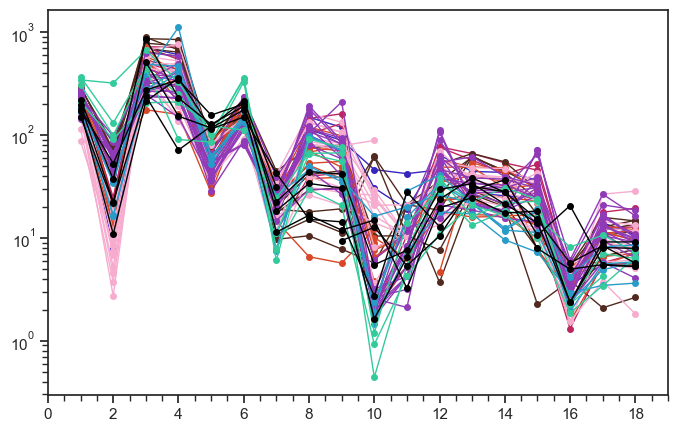

In [6]:
# iteratively make the spider diagram.

fig, ax = plt.subplots(figsize=(8, 5))
ax.set(yscale='log')

for i in range(len(y_pos)):
    ax.plot(pos, df[y_pos[i]], c=palette[i], lw=1, alpha=1,
            marker='o', mec=palette[i], ms=4
            )
    # ax.scatter(pos,df[y_pos[i]],c=palette[i], s=20)

ax.set_xlim(0, 19)
ax.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
ax.tick_params(axis='x', which='minor', bottom=True, direction='out')
ax.minorticks_on()

plt.savefig('../plots/SSB_spider.pdf')

Plot only samples from Dongpan, Shanggang and Qiakong  - The Nanpanjiang basin localities.

In [7]:
y_pos = [
         'DP10-2-16', 'DP10-5-13', 'DP-12', 'DP-11', 'DP-10', 'DP-9', 'DP-8', 'DP-7', 'DP-6', 'DP-5', 'DP-4', 'DP-3', 'DP-2', 'DP-1',
         'SHA 303T', 'SHA 306T', 'SHA 338T', 'SHA 359T', 
         'QIA 11T', 'QIA 13T', 'QIA 3T', 'QIA 7T', 'QIA 9T'
         ]

palette2 = dp+sha+qia

meta NOT subset; don't know how to subset; dropped


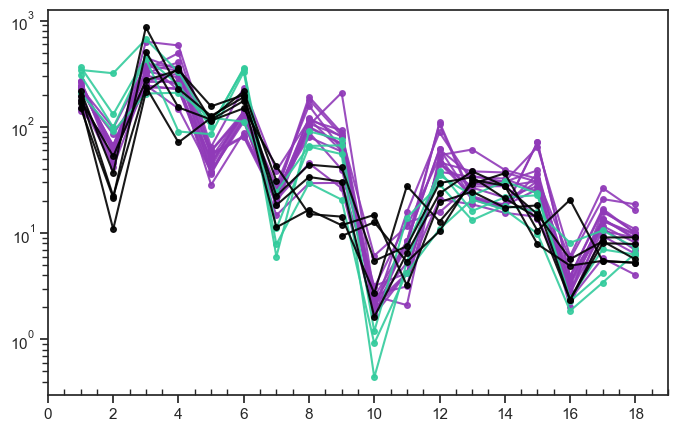

In [8]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set(yscale='log')
# for i in i_ndex:
#     ax.plot(xpos,data[i])
for i in range(len(y_pos)):
    ax.plot(df['x_pos'], df[y_pos[i]], c=palette2[i], lw=1.5, alpha=0.9,
            marker='o', mec = palette2[i], ms=4
            )
    # ax.scatter(pos, df[y_pos[i]], c=palette2[i], s=20)
ax.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
ax.set_xlim(0, 19)
ax.tick_params(axis='x', which='minor', bottom=True, direction='in')
ax.minorticks_on()
plt.savefig('../plots/Nb-basin_spider.pdf')
